# Hyperparameter Tuning Techniques

### Import the Dependencies

In [13]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
import optuna
from sklearn.metrics import root_mean_squared_error, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint

## Load the dataset

In [16]:
# Load sample data
data = load_iris()
X = data.data
y = data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### LinearRegression

In [19]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
linear_regression_mse = root_mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {linear_regression_mse}")

Linear Regression MSE: 0.24262650146330905


## DecisionTreeClassifier

In [25]:
# Initialize and train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
decision_tree_accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {decision_tree_accuracy}")

Decision Tree Accuracy: 0.9777777777777777


## LogisticRegression

In [28]:
# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
logistic_regression_accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {logistic_regression_accuracy}")


Logistic Regression Accuracy: 0.9777777777777777


## RandomForestClassifier

In [31]:
# Initialize and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
random_forest_accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {random_forest_accuracy}")


Random Forest Accuracy: 0.9777777777777777


## SVC

In [34]:
# Initialize and train the model
model = SVC()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {svm_accuracy}")


SVM Accuracy: 0.9777777777777777


In [36]:
## KNeighborsClassifier

In [38]:
# Initialize and train the model
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {knn_accuracy}")


KNN Accuracy: 0.9777777777777777


**GridSearch** is a technique used to systematically search for the best hyperparameters for a given machine learning model. It involves specifying a set of hyperparameters and their possible values, then evaluating the model's performance using all combinations of these values.

Here’s how GridSearch works:

1. **Define Parameter Grid**: Specify a grid of hyperparameters to search. For instance, if you’re tuning a Random Forest model, you might vary the number of trees (`n_estimators`), the maximum depth of the trees (`max_depth`), and the minimum number of samples required to split a node (`min_samples_split`).

2. **Cross-Validation**: Use cross-validation to evaluate the model's performance for each combination of hyperparameters. This helps ensure that the model's performance is robust and not just tuned to a specific training set.

3. **Select Best Parameters**: After evaluating all combinations, GridSearch selects the hyperparameters that give the best performance according to the specified metric (e.g., accuracy, F1 score).

GridSearch can be computationally expensive, especially with large parameter grids, so it's essential to balance the grid size with computational resources. For a more efficient search, you might consider RandomizedSearchCV, which samples from the parameter grid rather than searching exhaustively.

In [41]:
# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")


Best Parameters: {'max_depth': None, 'n_estimators': 100}
Best Score: 0.9428571428571428


**RandomizedSearchCV** is a more efficient alternative to GridSearchCV for hyperparameter tuning. Instead of trying every possible combination of hyperparameters, RandomizedSearchCV samples a fixed number of hyperparameter combinations from specified distributions. This approach can save time and computational resources, especially when dealing with large parameter spaces.

Here’s how RandomizedSearchCV works:

1. **Define Parameter Distributions**: Instead of specifying exact values for hyperparameters, you provide distributions or lists of possible values. RandomizedSearchCV will sample from these distributions.

2. **Specify Number of Iterations**: You choose how many different combinations of hyperparameters you want to try. This is controlled by the `n_iter` parameter.

3. **Cross-Validation**: Similar to GridSearchCV, RandomizedSearchCV uses cross-validation to evaluate the performance of each combination of hyperparameters.

4. **Select Best Parameters**: After sampling and evaluating, RandomizedSearchCV selects the hyperparameters that yield the best performance according to the specified metric.

RandomizedSearchCV is often faster than GridSearchCV because it doesn’t exhaustively search through all combinations. Instead, it samples a subset, which can be particularly useful when dealing with large datasets or complex models.

In [43]:
# Define parameter distributions for Random Forest
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, n_iter=10, cv=5, random_state=0)
random_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")


Best Parameters: {'max_depth': None, 'n_estimators': 108}
Best Score: 0.9523809523809523


In [44]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_categorical('max_depth', [None, 10, 20, 30])
    
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Create and run the study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print(f"Best Parameters: {study.best_params}")
print(f"Best Score: {study.best_value}")


[I 2024-07-28 01:07:19,570] A new study created in memory with name: no-name-7a0be927-8540-4c50-9c75-b630b30d8a92
[I 2024-07-28 01:07:19,937] Trial 0 finished with value: 0.9777777777777777 and parameters: {'n_estimators': 194, 'max_depth': None}. Best is trial 0 with value: 0.9777777777777777.
[I 2024-07-28 01:07:20,104] Trial 1 finished with value: 0.9777777777777777 and parameters: {'n_estimators': 103, 'max_depth': None}. Best is trial 0 with value: 0.9777777777777777.
[I 2024-07-28 01:07:20,279] Trial 2 finished with value: 0.9777777777777777 and parameters: {'n_estimators': 105, 'max_depth': None}. Best is trial 0 with value: 0.9777777777777777.
[I 2024-07-28 01:07:20,546] Trial 3 finished with value: 0.9777777777777777 and parameters: {'n_estimators': 172, 'max_depth': 10}. Best is trial 0 with value: 0.9777777777777777.
[I 2024-07-28 01:07:20,750] Trial 4 finished with value: 0.9777777777777777 and parameters: {'n_estimators': 122, 'max_depth': 20}. Best is trial 0 with value: 

Best Parameters: {'n_estimators': 194, 'max_depth': None}
Best Score: 0.9777777777777777


# Comparing of Models

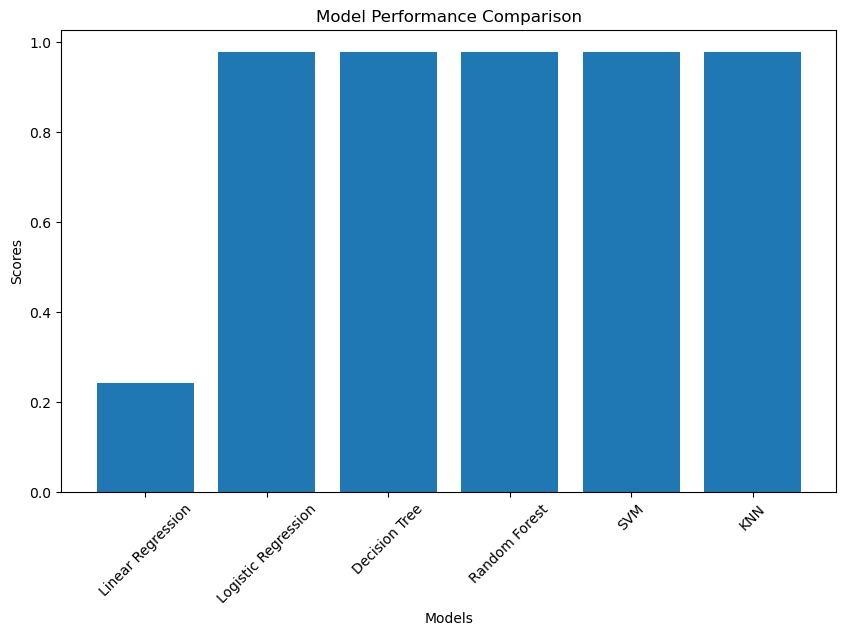

In [46]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN']
scores = [linear_regression_mse, logistic_regression_accuracy, decision_tree_accuracy, random_forest_accuracy, svm_accuracy, knn_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, scores)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.show()


# Another Example

In [48]:
# Load sample data
data = load_iris()
X = data.data
y = data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define models and parameter grids
models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=10000),
        'param_grid': {
            'C': [0.01, 0.1, 1, 10]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20]
        }
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    }
}

# Function to run hyperparameter tuning
def tune_model(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_, grid_search.best_score_

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    # Check if the model has predict_proba method
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)
        
        # Binary classification
        if y_prob.shape[1] == 2:
            roc_auc = roc_auc_score(y_test, y_prob[:, 1])
        # Multi-class classification
        else:
            # Use one-vs-rest for multi-class ROC AUC
            roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
        
        accuracy = accuracy_score(y_test, y_pred)
        return accuracy, roc_auc
    else:
        accuracy = accuracy_score(y_test, y_pred)
        return accuracy, None

# Results storage
results = []

# Loop through models
for model_name, model_info in models.items():
    print(f"Training and tuning {model_name}...")
    
    # Fit model
    model = model_info['model']
    param_grid = model_info['param_grid']
    
    # Hyperparameter tuning
    best_model, best_params, best_score = tune_model(model, param_grid, X_train, y_train)
    
    # Evaluate model
    accuracy, roc_auc = evaluate_model(best_model, X_test, y_test)
    
    # Store results
    results.append({
        'Model': model_name,
        'Best Parameters': best_params,
        'Best Score': best_score,
        'Test Accuracy': accuracy,
        'ROC AUC': roc_auc
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Optional: Use Bayesian Optimization for additional tuning
def objective(trial):
    model = RandomForestClassifier(
        n_estimators=trial.suggest_int('n_estimators', 50, 200),
        max_depth=trial.suggest_categorical('max_depth', [None, 10, 20])
    )
    model.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, model.predict(X_test))
    return accuracy


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)
print(f"Bayesian Optimization Best Parameters: {study.best_params}")
print(f"Bayesian Optimization Best Score: {study.best_value}")


Training and tuning Logistic Regression...
Training and tuning Decision Tree...
Training and tuning Random Forest...


[I 2024-07-28 01:07:34,551] A new study created in memory with name: no-name-be8715ba-d316-4c3e-bba0-91c0a6c7a270


Training and tuning SVM...
Training and tuning KNN...
                 Model                            Best Parameters  Best Score  \
0  Logistic Regression                                   {'C': 1}    0.952381   
1        Decision Tree  {'max_depth': 10, 'min_samples_split': 5}    0.961905   
2        Random Forest   {'max_depth': None, 'n_estimators': 100}    0.942857   
3                  SVM               {'C': 1, 'kernel': 'linear'}    0.971429   
4                  KNN   {'n_neighbors': 5, 'weights': 'uniform'}    0.961905   

   Test Accuracy   ROC AUC  
0       0.977778  0.996846  
1       0.977778  0.996846  
2       0.977778  0.993691  
3       0.977778  0.996846  
4       0.977778  0.984262  


[I 2024-07-28 01:07:34,765] Trial 0 finished with value: 0.9777777777777777 and parameters: {'n_estimators': 96, 'max_depth': None}. Best is trial 0 with value: 0.9777777777777777.
[I 2024-07-28 01:07:35,071] Trial 1 finished with value: 0.9777777777777777 and parameters: {'n_estimators': 138, 'max_depth': None}. Best is trial 0 with value: 0.9777777777777777.
[I 2024-07-28 01:07:35,448] Trial 2 finished with value: 0.9777777777777777 and parameters: {'n_estimators': 181, 'max_depth': None}. Best is trial 0 with value: 0.9777777777777777.
[I 2024-07-28 01:07:35,786] Trial 3 finished with value: 0.9777777777777777 and parameters: {'n_estimators': 146, 'max_depth': 10}. Best is trial 0 with value: 0.9777777777777777.
[I 2024-07-28 01:07:36,137] Trial 4 finished with value: 0.9777777777777777 and parameters: {'n_estimators': 170, 'max_depth': 20}. Best is trial 0 with value: 0.9777777777777777.
[I 2024-07-28 01:07:36,400] Trial 5 finished with value: 0.9777777777777777 and parameters: {'n

Bayesian Optimization Best Parameters: {'n_estimators': 96, 'max_depth': None}
Bayesian Optimization Best Score: 0.9777777777777777
